# Practice 4 - Multiple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from typing import Optional
import math
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [2]:
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Part 1: Hands-On Multiple Linear Regression

### Data preparation
We have already isolated the X and the y variables:  
- 'sales' is your target variable.  
- For now we will use 'TV' and 'radio' as features  

No need for a train-test split for now.

In [3]:
X = data[['TV', 'radio']].values
y = data['sales'].values.reshape(-1,1)

### Upgrade the MyLinearRegression class 
Complete the following class to implement multiple linear regression.

In [9]:
class MyLinearRegression:
    def __init__(self):
        self.beta: Optional[np.ndarray] = None
    
    def set_beta(self, beta: np.ndarray):
        self.beta = beta
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        n_samples, n_features = X.shape
        
        # Add a column of ones to X for the intercept term
        X = np.hstack([np.ones((n_samples, 1)), X])
        
        return X.dot(self.beta)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Add a column of ones to X for the intercept term
        X = np.hstack([np.ones((n_samples, 1)), X])
        
        # Compute the coefficients using the normal equation
        self.beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        return X @ self.beta
    


        

In [10]:
test_regr = MyLinearRegression()
test_regr.set_beta(np.ones(3))
predictions = test_regr.predict(X)

assert X.shape[1] == 2, "❌ Your X_train matrix should have 2 columns"
assert y.shape == (200,1), "❌ Your y vector has the wrong shape."
assert isinstance(predictions, np.ndarray), "❌ Your regressor should return a numpy array."
assert predictions.shape in [y.shape, (200,)], "❌ Your array of predictions should have the same shape as y."
assert math.isclose(predictions[0], X[0,:].sum() + 1), "❌ Your calculations within the predict() method aren't quite right."
print("👌 Seems good.")

👌 Seems good.


### Visualize multiple regression 

#### Choose beta values at random and visualize your model in 3d
- Beta_0
- Beta_1 for TV advertisement
- Beta_2 for Radio advertisement

In [7]:
beta = np.array([-10, 0.5, 0.3])

my_linear_regression = MyLinearRegression()
my_linear_regression.set_beta(beta)
assert len(beta) == 3, "You should have 3 parameters"

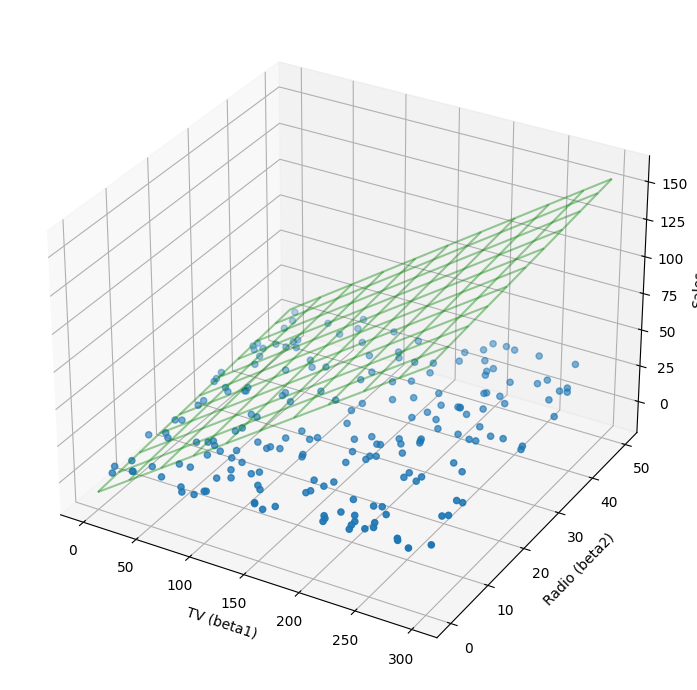

In [13]:
# Use this function to visualize your regression in 3d

def visualize_3d(regression_model):
    def create_mesh(beta):
        x_values = np.linspace(0, 300, 50).reshape(-1,1)
        y_values = np.linspace(0, 50, 50).reshape(-1,1)
        x_mesh, y_mesh = np.meshgrid(x_values, y_values)
        z_mesh = beta[0] + beta[1] * x_mesh + beta[2] * y_mesh
        return x_mesh, y_mesh, z_mesh
    
    if isinstance(regression_model, LinearRegression):
        beta = np.hstack([regression_model.intercept_, regression_model.coef_.squeeze()])
    else:
        beta = regression_model.beta
        
    x_mesh, y_mesh, z_mesh = create_mesh(beta)
    
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection="3d")
    
    ax.scatter3D(data['TV'], data['radio'], data['sales'].squeeze())
    ax.plot_wireframe(x_mesh, y_mesh, z_mesh, rstride=5, cstride=5, alpha=0.4, color='g')
    
    ax.set_xlabel('TV (beta1)')
    ax.set_ylabel('Radio (beta2)')
    ax.set_zlabel('Sales')
    plt.tight_layout()
    plt.show()
    
visualize_3d(my_linear_regression)

### Train a linear regression model with Scikit-learn, visualize it and retrieve its learned parameters. 

In [14]:
# Retrieve the learned parameters
intercept = regression_model.intercept_
coefficients = regression_model.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)

NameError: name 'regression_model' is not defined

# Part 2: Hands-on  polynomial regression 
Here we will focus on one feature, 'TV', but we will create polynomial features from it.

### Data Preparation 

In [ ]:
X_poly = data[['TV']]
y_poly = data['sales']
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly, y_poly, test_size = 0.25, random_state = 0)

### Create a pipeline to combine the following elements
To make our code much cleaner and easier to follow, we will pack all our transformers, along with our regressor, into a pipeline. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- PolynomialFeatures of degree 8
- A StandardScaler (Can you tell why this is necessary?)
- A LinearRegression model (Sklearn)

In [ ]:
polynomial_regression_pipeline = Pipeline([
    # YOUR CODE HERE
  
])

### Fit your pipeline on the poly training set and retrieve the coefficients of your LinearRegression
Hint: you can access the regressor by calling `.named_steps['name_of_the_regressor']` on your pipeline.

#### Play with the degree of the polynomial features and see what happens to the size of the coefficients.

###  Visualize your polynomial regression model
Use the function defined for you below.

In [ ]:
def visualize_polynomial(polynomial_regression_pipeline):
    X_plot = pd.DataFrame({'TV': np.arange(min(data['TV']),max(data['TV']),1)})
    y_poly_plot = polynomial_regression_pipeline.predict(X_plot)

    plt.figure(figsize=(16, 8))
    plt.scatter(X_train_poly, y_train_poly, c='lightgray')
    plt.scatter(X_val_poly, y_val_poly, c='black')
    plt.plot(X_plot, y_poly_plot, c='blue', linewidth=2, label='polynomial')

    plt.xlabel("Money spent on TV ads ($)")
    plt.ylabel("Sales ($)")
    plt.legend()
    plt.show()

visualize_polynomial(polynomial_regression_pipeline)

#### Play with the degree of the polynomial features and see what happens to the curve

# Part 3: Assignment 
## Data Exploration

### a) Compute the correlation matrix

### b) Plot the sales as a function of the variable that is the most correlated with them

### c) Plot the sales as a function of the variable that is the LEAST correlated

## Evaluation
Before we move further, you will create a function that you will reuse over and over to evaluate your models. It may look a little complex at first, but you will see later, when you compare multiple models, that it is very handy to pack your results in a tabular form.  

Your function should:
- Generate predictions with the model on the validation datset
- Compute the following metrics: MSE, RMSE, MAE, R2 (you can use sklearn's implementation)
- Pack the results in a dataframe, with each metric on a separate row, and the name of the metric should be the index of the row.
- The results should appear in the same column, whose name describe the model variant you are evaluating.

In [ ]:
def evaluate_regression(regressor, name, X_val, y_val):
    # YOUR CODE HERE
    ...

evaluate_regression(polynomial_regression_pipeline, 'poly_regression', X_val_poly, y_val_poly)

### Test your function: evaluate one of your previous models 

## Crazily overfitting model
We will now experiment how a very complex model can be regularized.

### Re-define your dataset in order to use all variables. 
Define the following variables:
- X_train
- y_train
- X_val
- y_val

### Train a linear regression model on all 3 features, with polynomial features of degree 15
You should consider using a Pipeline as in the previous section.

### Evaluate your overfitting model with your evaluation function 

### Regularize your model: 
- Write a new version of your pipeline, but instead of using LinearRegression, use Ridge regression
- evaluate your regularized model


### Tune your regularizer
The Ridge regressor has an alpha hyperparameter [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Already with the default setting, you were able to improve a lot your performance. Try adjusting the alpha hyperparameter to see if you can bring up the performance even more. Try out different values and keep the one that gives the best results.